# 커피템플 오프라인 원두 판매량

In [ ]:
df2.head()

,결제일,결제시간,주문 채널,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,...,환불,환불 일시,배달팁(매출 포함x),카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제메모
0,2022-02-28,18:24:04,셀러,드립백 클래식 외 1건,18100,-,-,18100,-,-,...,-,-,-,블렌딩원두,종이백,-,1,100,100,-
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,드립백/캡슐,드립백 클래식,-,1,18000,18000,NaN
2,2022-02-28,18:23:51,셀러,드립백 클래식 외 1건,18100,-,-,18100,-,-,...,-,-,-,드립백/캡슐,드립백 클래식,-,1,18000,18000,-
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,블렌딩원두,종이백,-,1,100,100,NaN
4,2022-02-28,18:12:49,셀러,캡슐 클래식 외 2건,30100,-,-,30100,-,-,...,-,-,-,드립백/캡슐,캡슐 클래식,-,1,15000,15000,-


In [ ]:
df2_c = df2['카테고리'].count()

In [ ]:
se_li = ['드립백/캡슐', '블렌딩원두', '사업자', '싱글원두']

In [ ]:
df_cb = df2[df2['카테고리'].str.contains('|'.join(se_li))]

In [ ]:
df2[df2['카테고리'].str.contains('|'.join(se_li))]['카테고리'].count()

848

In [ ]:
df_cb_c = df_cb[df_cb['상품명'] != '종이백']['카테고리'].count()

In [ ]:
df_cb_c

667

In [ ]:
cb_r = round((df_cb_c/df2_c)*100,2)
cb_r

10.4

In [ ]:
df_list = [df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

In [ ]:
cb_rate = []
for i in df_list:
    k = i[i['카테고리'].str.contains('|'.join(se_li))]
    cb_rate.append(round((k[k['상품명'] != '종이백']['카테고리'].count() / i['카테고리'].count()*100), 2))

In [ ]:
cb_rate

[10.48,
 9.03,
 8.46,
 9.02,
 8.79,
 10.84,
 11.76,
 11.36,
 9.82,
 11.53,
 12.05,
 10.91,
 10.24,
 9.74,
 10.36,
 9.93]

In [ ]:
df2_drop = df2[df2['합계'].notnull()]

In [ ]:
df2_drop = df2_drop[df2_drop['합계'] != '-']

In [ ]:
df2_drop['합계'].sum()

48337300

In [ ]:
df2[df2['상품별 합계'] != '-']['상품별 합계'].sum()

48341300

In [ ]:
se_li = ['드립백/캡슐', '블렌딩원두', '사업자', '싱글원두']

In [ ]:
df_cb = df2[df2['카테고리'].str.contains('|'.join(se_li))]

In [ ]:
df_cb = df_cb[df_cb['상품별 합계'] != '-']

In [ ]:
df_cb['상품별 합계'].sum()

14074300

In [ ]:
df_list = [df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

In [ ]:
sum_rate = []
for i in df_list:
    l = i[i['카테고리'].str.contains('|'.join(se_li))]
    k = l[l['상품명'] != '종이백']
    sum_rate.append(round((k[k['상품별 합계'] != '-']['상품별 합계'].sum() / i[i['상품별 합계'] != '-']['상품별 합계'].sum())*100, 2))

In [ ]:
sum_rate

[29.07,
 21.71,
 20.12,
 22.52,
 21.43,
 24.79,
 22.92,
 23.53,
 21.01,
 22.32,
 24.51,
 25.22,
 23.95,
 21.79,
 22.92,
 24.65]

In [ ]:
dfcb = {'x' : ['2022-02','2022-03','2022-04','2022-05','2022-06',
                '2022-07','2022-08','2022-09','2022-10','2022-11','2022-12',
                '2023-01','2023-02','2023-03','2023-04','2023-05'],
        'y' : cb_rate,
        'z' : sum_rate}

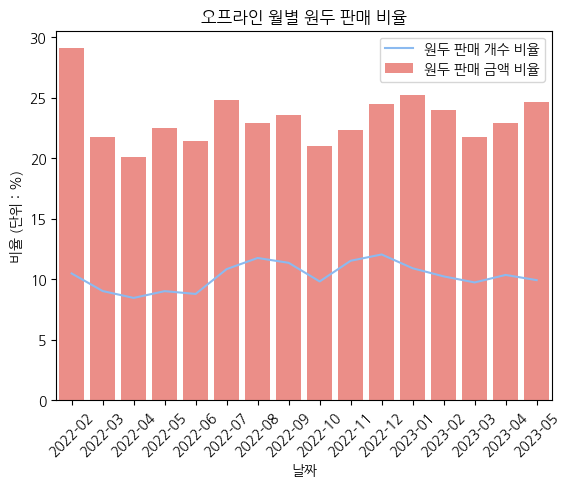

In [ ]:
# 원두 판매 개수 비율
sns.lineplot(x='x', y='y', data=dfcb, color='#8BBAF0', label='원두 판매 개수 비율')

# 원두 판매 금액 비율
sns.barplot(x='x', y='z', data=dfcb, color='#FC7F77', label='원두 판매 금액 비율')

plt.xlabel('날짜')
plt.ylabel('비율 (단위 : %)')

plt.legend()

plt.xticks(rotation=45)

plt.title('오프라인 월별 원두 판매 비율')

plt.show()

# 오프라인 리뷰 작성 비율

In [ ]:
df_r = pd.read_excel('/content/커피템플 월별 방문자 리뷰 개수.xlsx')

In [ ]:
df_all = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], axis=0)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145010 entries, 0 to 10568
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   결제일          66668 non-null   object
 1   결제시간         66668 non-null   object
 2   주문 채널        66668 non-null   object
 3   결제내역         66668 non-null   object
 4   합계           66668 non-null   object
 5   상품별 할인       66668 non-null   object
 6   결제 할인        66668 non-null   object
 7   카드 결제        66668 non-null   object
 8   현금 결제        66668 non-null   object
 9   간편 결제        66668 non-null   object
 10  기타 결제        66668 non-null   object
 11  온라인 스토어      66668 non-null   object
 12  사용 포인트       66668 non-null   object
 13  적립 포인트       66668 non-null   object
 14  사용 선불권       66668 non-null   object
 15  환불           66668 non-null   object
 16  환불 일시        66668 non-null   object
 17  배달팁(매출 포함x)  66668 non-null   object
 18  카테고리         145010 non-null  object
 19  상품명

In [ ]:
df_ad = df_all[df_all['결제일'].notnull()]

In [ ]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66668 entries, 0 to 10567
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   결제일          66668 non-null  object
 1   결제시간         66668 non-null  object
 2   주문 채널        66668 non-null  object
 3   결제내역         66668 non-null  object
 4   합계           66668 non-null  object
 5   상품별 할인       66668 non-null  object
 6   결제 할인        66668 non-null  object
 7   카드 결제        66668 non-null  object
 8   현금 결제        66668 non-null  object
 9   간편 결제        66668 non-null  object
 10  기타 결제        66668 non-null  object
 11  온라인 스토어      66668 non-null  object
 12  사용 포인트       66668 non-null  object
 13  적립 포인트       66668 non-null  object
 14  사용 선불권       66668 non-null  object
 15  환불           66668 non-null  object
 16  환불 일시        66668 non-null  object
 17  배달팁(매출 포함x)  66668 non-null  object
 18  카테고리         66668 non-null  object
 19  상품명          66668 non-nu

In [ ]:
df_ad.head()

,결제일,결제시간,주문 채널,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,...,환불,환불 일시,배달팁(매출 포함x),카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제메모
0,2022-02-28,18:24:04,셀러,드립백 클래식 외 1건,18100,-,-,18100,-,-,...,-,-,-,블렌딩원두,종이백,-,1,100,100,-
2,2022-02-28,18:23:51,셀러,드립백 클래식 외 1건,18100,-,-,18100,-,-,...,-,-,-,드립백/캡슐,드립백 클래식,-,1,18000,18000,-
4,2022-02-28,18:12:49,셀러,캡슐 클래식 외 2건,30100,-,-,30100,-,-,...,-,-,-,드립백/캡슐,캡슐 클래식,-,1,15000,15000,-
7,2022-02-28,18:09:20,셀러,캡슐 클래식,15000,-,-,15000,-,-,...,-,-,-,드립백/캡슐,캡슐 클래식,-,1,15000,15000,-
8,2022-02-28,17:50:11,셀러,아이스 텐저린 라떼 외 2건,21500,-,-,21500,-,-,...,-,-,-,MD,RTD 텐라보틀,-,1,8000,8000,-


In [ ]:
df_ad[['연도', '월', '일']] = df_ad['결제일'].str.split('-', expand=True)

<ipython-input-52-210ab20fe87d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ad[['연도', '월', '일']] = df_ad['결제일'].str.split('-', expand=True)
<ipython-input-52-210ab20fe87d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ad[['연도', '월', '일']] = df_ad['결제일'].str.split('-', expand=True)
<ipython-input-52-210ab20fe87d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df_ad.head()

,결제일,결제시간,주문 채널,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,...,카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제메모,연도,월,일
0,2022-02-28,18:24:04,셀러,드립백 클래식 외 1건,18100,-,-,18100,-,-,...,블렌딩원두,종이백,-,1,100,100,-,2022,02,28
2,2022-02-28,18:23:51,셀러,드립백 클래식 외 1건,18100,-,-,18100,-,-,...,드립백/캡슐,드립백 클래식,-,1,18000,18000,-,2022,02,28
4,2022-02-28,18:12:49,셀러,캡슐 클래식 외 2건,30100,-,-,30100,-,-,...,드립백/캡슐,캡슐 클래식,-,1,15000,15000,-,2022,02,28
7,2022-02-28,18:09:20,셀러,캡슐 클래식,15000,-,-,15000,-,-,...,드립백/캡슐,캡슐 클래식,-,1,15000,15000,-,2022,02,28
8,2022-02-28,17:50:11,셀러,아이스 텐저린 라떼 외 2건,21500,-,-,21500,-,-,...,MD,RTD 텐라보틀,-,1,8000,8000,-,2022,02,28


In [ ]:
df_ad = df_ad[df_ad['합계'] != '-']

In [ ]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65874 entries, 0 to 10567
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   결제일          65874 non-null  object
 1   결제시간         65874 non-null  object
 2   주문 채널        65874 non-null  object
 3   결제내역         65874 non-null  object
 4   합계           65874 non-null  object
 5   상품별 할인       65874 non-null  object
 6   결제 할인        65874 non-null  object
 7   카드 결제        65874 non-null  object
 8   현금 결제        65874 non-null  object
 9   간편 결제        65874 non-null  object
 10  기타 결제        65874 non-null  object
 11  온라인 스토어      65874 non-null  object
 12  사용 포인트       65874 non-null  object
 13  적립 포인트       65874 non-null  object
 14  사용 선불권       65874 non-null  object
 15  환불           65874 non-null  object
 16  환불 일시        65874 non-null  object
 17  배달팁(매출 포함x)  65874 non-null  object
 18  카테고리         65874 non-null  object
 19  상품명          65874 non-nu

In [ ]:
# 연도와 월을 합쳐서 새로운 열 '연월'을 생성
df_ad['연월'] = df_ad['연도'] + '-' + df_ad['월']

In [ ]:
df_ad['연월']

0        2022-02
2        2022-02
4        2022-02
7        2022-02
8        2022-02
          ...   
10560    2023-05
10561    2023-05
10563    2023-05
10566    2023-05
10567    2023-05
Name: 연월, Length: 65874, dtype: object

In [ ]:
df_ad_date_group = df_ad.groupby('연월')['합계'].count()

In [ ]:
df_ad_date_group = pd.DataFrame(df_ad_date_group)

In [ ]:
df_ad_date_group

,합계
연월,
2022-02,2605
2022-03,5134
2022-04,5831
2022-05,5382
2022-06,4443
2022-07,3772
2022-08,3933
2022-09,3545
2022-10,3998


In [ ]:
df_r.head()

,날짜,리뷰개수
0,2023-05-01,19
1,2023-04-01,27
2,2023-03-01,37
3,2023-02-01,23
4,2023-01-01,35


In [ ]:
# Timestamp 데이터를 str 타입으로 변환
df_r['날짜'] = df_r['날짜'].dt.strftime("%Y-%m-%d")

In [ ]:
df_r[['연도', '월', '일']] = df_r['날짜'].str.split('-', expand=True)

In [ ]:
df_r['연월'] = df_r['연도'] + '-' + df_r['월']

In [ ]:
df_r

,날짜,리뷰개수,연도,월,일,연월
0,2023-05-01,19,2023,05,01,2023-05
1,2023-04-01,27,2023,04,01,2023-04
2,2023-03-01,37,2023,03,01,2023-03
3,2023-02-01,23,2023,02,01,2023-02
4,2023-01-01,35,2023,01,01,2023-01
5,2022-12-01,34,2022,12,01,2022-12
6,2022-11-01,28,2022,11,01,2022-11
7,2022-10-01,33,2022,10,01,2022-10
8,2022-09-01,19,2022,09,01,2022-09
9,2022-08-01,33,2022,08,01,2022-08


In [ ]:
df_r_list = [i for i in reversed(df_r['리뷰개수'])]

In [ ]:
df_r_dlist = [i for i in reversed(df_r['연월'])]

In [ ]:
df_r2 = pd.DataFrame({'연월':df_r_dlist,
         '리뷰개수':df_r_list})

In [ ]:
df_r2

,연월,리뷰개수
0,2022-02,13
1,2022-03,26
2,2022-04,33
3,2022-05,25
4,2022-06,29
5,2022-07,25
6,2022-08,33
7,2022-09,19
8,2022-10,33
9,2022-11,28


In [ ]:
round((df_r2['리뷰개수'][0] / df_ad_date_group['합계'][0])*100, 2)

0.5

In [ ]:
re_rate = []
for i in range(16):
    re_rate.append(round((df_r2['리뷰개수'][i] / df_ad_date_group['합계'][i])*100, 2))

In [ ]:
re_rate

[0.5,
 0.51,
 0.57,
 0.46,
 0.65,
 0.66,
 0.84,
 0.54,
 0.83,
 0.75,
 0.97,
 0.98,
 0.64,
 0.83,
 0.65,
 0.45]

In [ ]:
df_r2['리뷰비율'] = re_rate

In [ ]:
df_r2

,연월,리뷰개수,리뷰비율
0,2022-02,13,0.50
1,2022-03,26,0.51
2,2022-04,33,0.57
3,2022-05,25,0.46
4,2022-06,29,0.65
5,2022-07,25,0.66
6,2022-08,33,0.84
7,2022-09,19,0.54
8,2022-10,33,0.83
9,2022-11,28,0.75


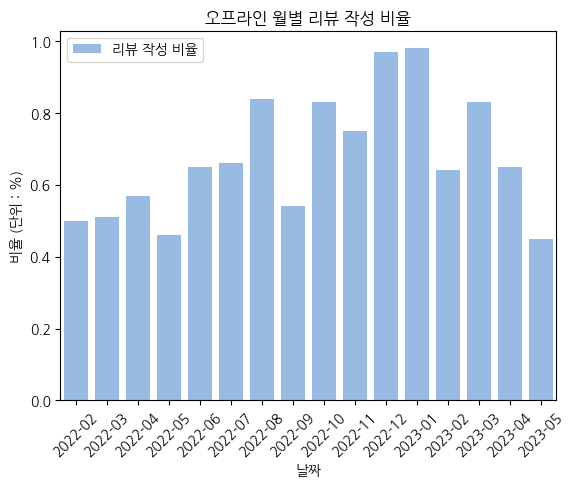

In [ ]:
sns.barplot(x=df_r2['연월'], y=df_r2['리뷰비율'], data=df_r2, color='#8BBAF0', label='리뷰 작성 비율')

plt.xlabel('날짜')
plt.ylabel('비율 (단위 : %)')

plt.legend()

plt.xticks(rotation=45)

plt.title('오프라인 월별 리뷰 작성 비율')

plt.show()

In [ ]:
sns.barplot(x=df_r2['연월'], y=df_r2['리뷰비율'], data=df_r2, color='#8BBAF0', label='리뷰 작성 비율')

plt.xlabel('날짜')
plt.ylabel('비율 (단위 : %)')

plt.legend()

plt.xticks(rotation=45)

plt.title('오프라인 월별 리뷰 작성 비율')

plt.show()

In [ ]:
df_pur = [2605,5134,5831,5382,4443,
            3772,3933,3545,3998,3731,
            3521,3568,3578,4436,4130,4267]

In [ ]:
df_review = [13,26,33,25,29,25,33,19,33,28,34,35,23,37,27,19]

In [ ]:
df_date = ['2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12','2023-01','2023-02','2023-03','2023-04','2023-05']

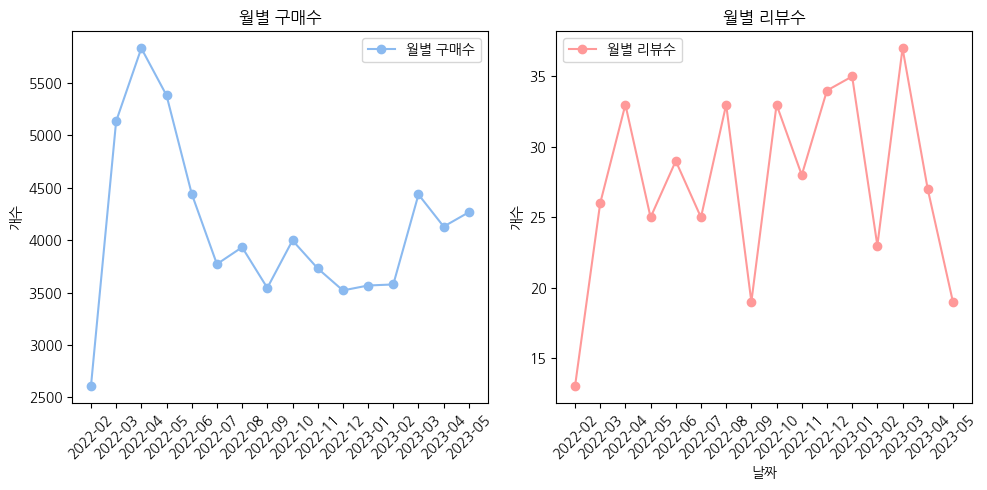

In [ ]:
import matplotlib.pyplot as plt

# Figure와 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 라인 차트
ax1.plot(df_date, df_pur, label='월별 구매수', marker='o', linestyle='-', color='#8BBAF0')
ax1.set_ylabel('개수')
ax1.set_title('월별 구매수')
ax1.legend()

# 두 번째 라인 차트
ax2.plot(df_date, df_review, label='월별 리뷰수', marker='o', linestyle='-', color='#ff9999')
ax2.set_xlabel('날짜')
ax2.set_ylabel('개수')
ax2.set_title('월별 리뷰수')
ax2.legend()

# 서브플롯의 x축 눈금 레이블을 회전
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 그리기
plt.show()


In [ ]:
df_rm = []
for i in range(len(df_review)):
    df_rm.append(df_review[i] * 1800)

In [ ]:
df_rm

[23400,
 46800,
 59400,
 45000,
 52200,
 45000,
 59400,
 34200,
 59400,
 50400,
 61200,
 63000,
 41400,
 66600,
 48600,
 34200]

In [ ]:
df_ad_date_sum = df_ad.groupby('연월')['합계'].sum()

In [ ]:
df_ad_date_sum = pd.DataFrame(df_ad_date_sum)

In [ ]:
df_ad_date_sum

,합계
연월,
2022-02,48337300
2022-03,93119200
2022-04,100824800
2022-05,97623600
2022-06,81317700
2022-07,70041802
2022-08,71376200
2022-09,66923300
2022-10,73047700


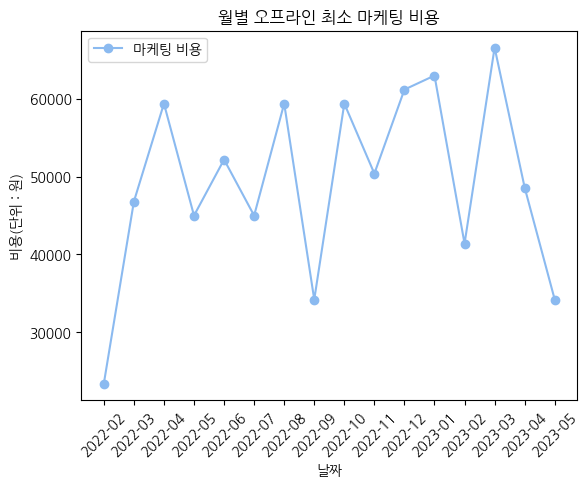

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 라인 차트
plt.plot(df_date, df_rm, label='마케팅 비용', marker='o', linestyle='-', color='#8BBAF0')

# X, Y 축 레이블
plt.xlabel('날짜')
plt.ylabel('비용(단위 : 원)')

# 그래프 제목
plt.title('월별 오프라인 최소 마케팅 비용')

# 범례 표시
plt.legend()

plt.xticks(rotation=45)

# 그래프 그리기
plt.show()


In [ ]:
df_rm10 = []
for i in df_rm:
    df_rm10.append(i*10)

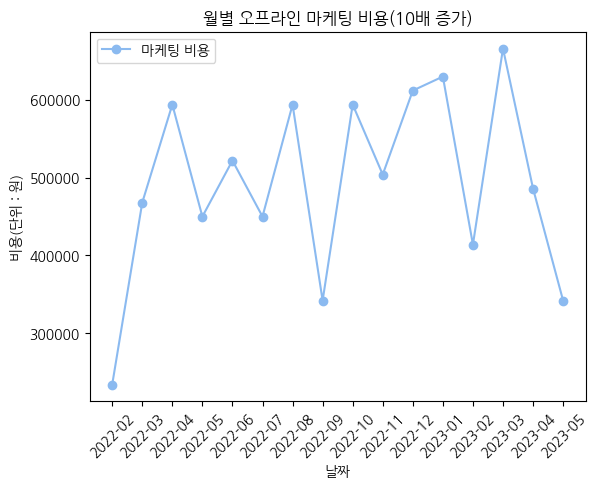

In [ ]:
# 리뷰 작성률 10배 증가 시

import matplotlib.pyplot as plt

# 첫 번째 라인 차트
plt.plot(df_date, df_rm10, label='마케팅 비용', marker='o', linestyle='-', color='#8BBAF0')

# X, Y 축 레이블
plt.xlabel('날짜')
plt.ylabel('비용(단위 : 원)')

# 그래프 제목
plt.title('월별 오프라인 마케팅 비용(10배 증가)')

# 범례 표시
plt.legend()

plt.xticks(rotation=45)

# 그래프 그리기
plt.show()

In [ ]:
df_rm20 = []
for i in df_rm:
    df_rm20.append(i*20)

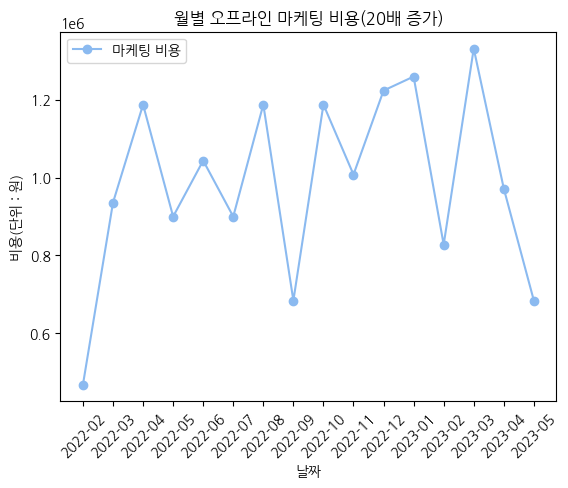

In [ ]:
# 리뷰 작성률 20배 증가 시

import matplotlib.pyplot as plt

# 첫 번째 라인 차트
plt.plot(df_date, df_rm20, label='마케팅 비용', marker='o', linestyle='-', color='#8BBAF0')

# X, Y 축 레이블
plt.xlabel('날짜')
plt.ylabel('비용(단위 : 원)')

# 그래프 제목
plt.title('월별 오프라인 마케팅 비용(20배 증가)')

# 범례 표시
plt.legend()

plt.xticks(rotation=45)

# 그래프 그리기
plt.show()

In [ ]:
import numpy as np

average = np.mean(df_rm)
average10 = np.mean(df_rm10)
average20 = np.mean(df_rm20)
print(average, average10, average20)

49387.5 493875.0 987750.0


In [ ]:
df_sr = []
for i in range(len(df_rm)):
    df_sr.append(round((df_rm[i] / df_ad_date_sum['합계'][i])*100, 2))

In [ ]:
df_sr

[0.05,
 0.05,
 0.06,
 0.05,
 0.06,
 0.06,
 0.08,
 0.05,
 0.08,
 0.08,
 0.1,
 0.09,
 0.06,
 0.08,
 0.06,
 0.04]

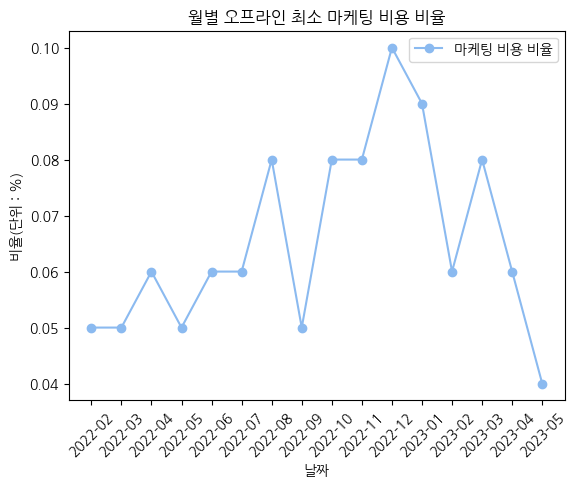

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 라인 차트
plt.plot(df_date, df_sr, label='마케팅 비용 비율', marker='o', linestyle='-', color='#8BBAF0')

# X, Y 축 레이블
plt.xlabel('날짜')
plt.ylabel('비율(단위 : %)')

# 그래프 제목
plt.title('월별 오프라인 최소 마케팅 비용 비율')

# 범례 표시
plt.legend()

plt.xticks(rotation=45)

# 그래프 그리기
plt.show()


In [ ]:
df_sr10 = []
for i in range(len(df_rm)):
    df_sr10.append(round((df_rm10[i] / df_ad_date_sum['합계'][i])*100, 2))

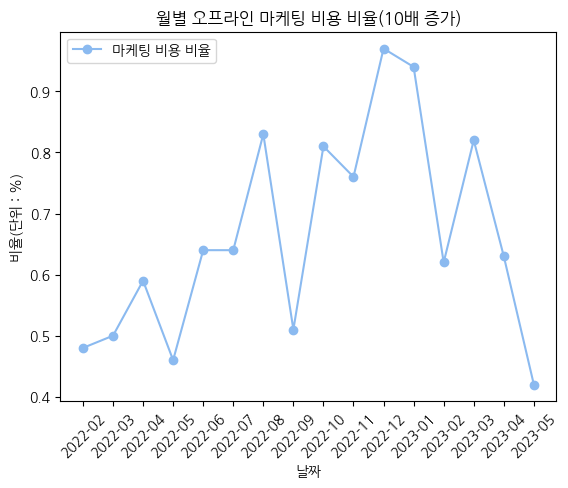

In [ ]:
# 10배 증가 시 마케팅 비용

import matplotlib.pyplot as plt

# 첫 번째 라인 차트
plt.plot(df_date, df_sr10, label='마케팅 비용 비율', marker='o', linestyle='-', color='#8BBAF0')

# X, Y 축 레이블
plt.xlabel('날짜')
plt.ylabel('비율(단위 : %)')

# 그래프 제목
plt.title('월별 오프라인 마케팅 비용 비율(10배 증가)')

# 범례 표시
plt.legend()

plt.xticks(rotation=45)

# 그래프 그리기
plt.show()


In [ ]:
df_sr20 = []
for i in range(len(df_rm)):
    df_sr20.append(round((df_rm20[i] / df_ad_date_sum['합계'][i])*100, 2))

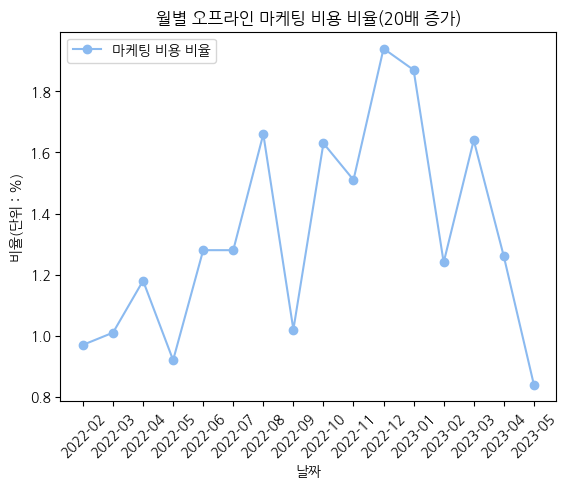

In [ ]:
# 20배 증가 시 마케팅 비용

import matplotlib.pyplot as plt

# 첫 번째 라인 차트
plt.plot(df_date, df_sr20, label='마케팅 비용 비율', marker='o', linestyle='-', color='#8BBAF0')

# X, Y 축 레이블
plt.xlabel('날짜')
plt.ylabel('비율(단위 : %)')

# 그래프 제목
plt.title('월별 오프라인 마케팅 비용 비율(20배 증가)')

# 범례 표시
plt.legend()

plt.xticks(rotation=45)

# 그래프 그리기
plt.show()


# 커피템플 온라인 리뷰 마케팅 비용

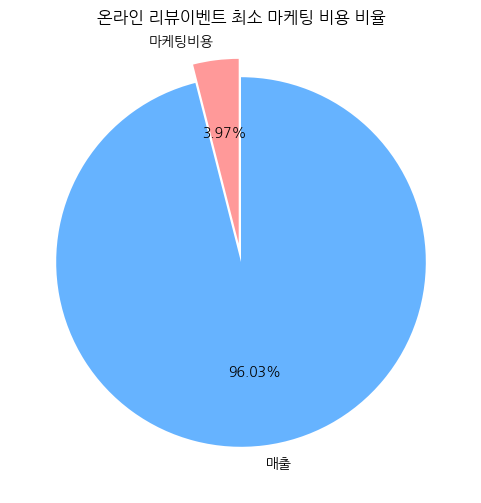

In [ ]:
import matplotlib.pyplot as plt

# 데이터 예시 (라벨과 값)
labels = ['마케팅비용', '매출']
values = [3.97, 96.03]

# 색상 설정
colors = ['#ff9999', '#66b3ff']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰이벤트 최소 마케팅 비용 비율')

# 파이 차트 그리기
plt.show()


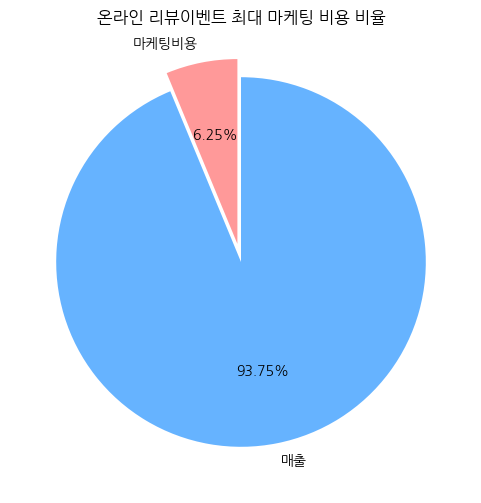

In [ ]:
# 데이터 예시 (라벨과 값)
labels = ['마케팅비용', '매출']
values = [6.25, 93.75]

# 색상 설정
colors = ['#ff9999', '#66b3ff']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰이벤트 최대 마케팅 비용 비율')

# 파이 차트 그리기
plt.show()

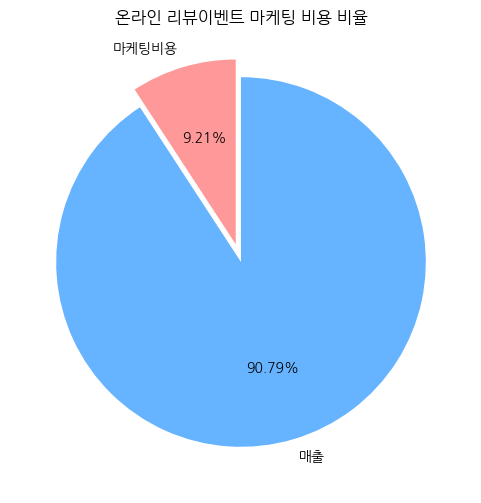

In [ ]:
# 드립백 제공 시

# 데이터 예시 (라벨과 값)
labels = ['마케팅비용', '매출']
values = [9.21, 90.79]

# 색상 설정
colors = ['#ff9999', '#66b3ff']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰이벤트 마케팅 비용 비율')

# 파이 차트 그리기
plt.show()

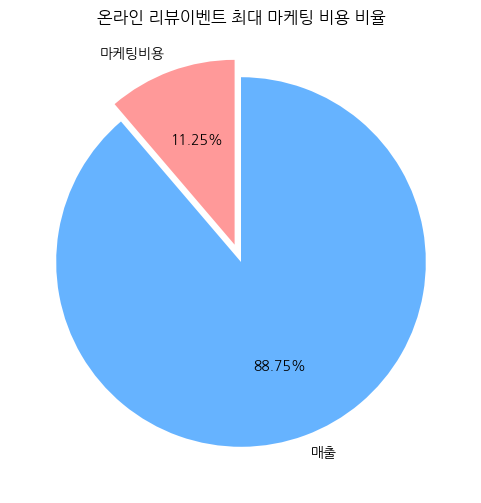

In [ ]:
# 드립백 제공 시

# 데이터 예시 (라벨과 값)
labels = ['마케팅비용', '매출']
values = [11.25, 88.75]

# 색상 설정
colors = ['#ff9999', '#66b3ff']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰이벤트 최대 마케팅 비용 비율')

# 파이 차트 그리기
plt.show()

# 온라인 리뷰전환율

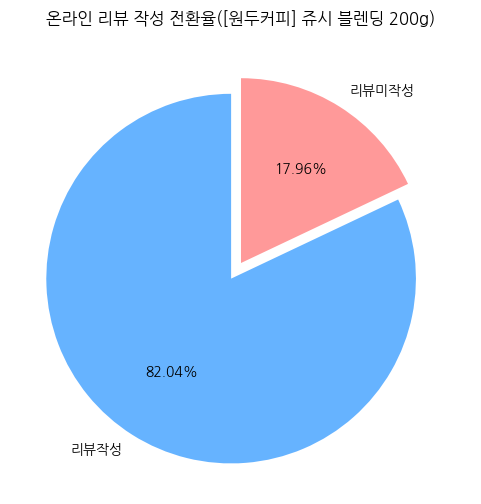

In [ ]:
# 데이터 예시 (라벨과 값)
labels = ['리뷰작성', '리뷰미작성']
values = [82.04, 17.96]

# 색상 설정
colors = ['#66b3ff', '#ff9999']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰 작성 전환율([원두커피] 쥬시 블렌딩 200g)')

# 파이 차트 그리기
plt.show()

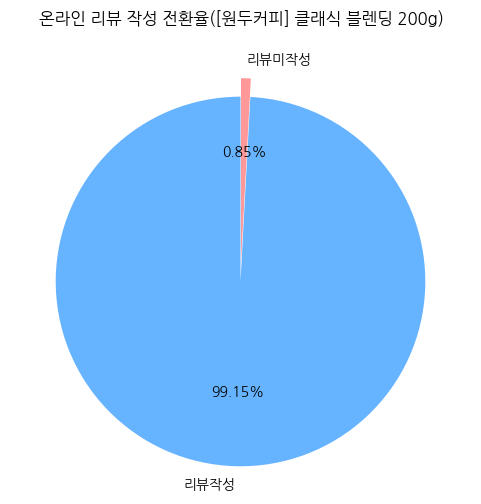

In [ ]:
# 데이터 예시 (라벨과 값)
labels = ['리뷰작성', '리뷰미작성']
values = [99.15, 0.85]

# 색상 설정
colors = ['#66b3ff', '#ff9999']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰 작성 전환율([원두커피] 클래식 블렌딩 200g)')

# 파이 차트 그리기
plt.show()

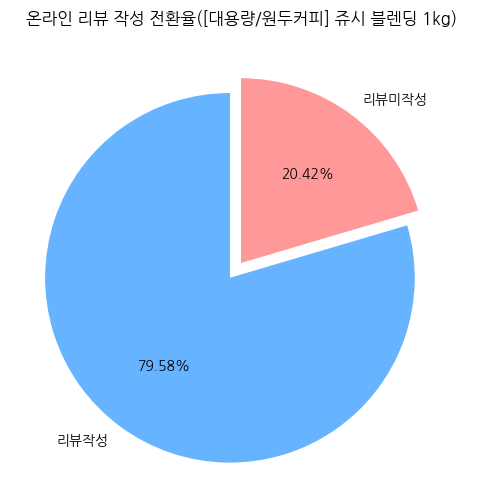

In [ ]:
# 데이터 예시 (라벨과 값)
labels = ['리뷰작성', '리뷰미작성']
values = [79.58, 20.42]

# 색상 설정
colors = ['#66b3ff', '#ff9999']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰 작성 전환율([대용량/원두커피] 쥬시 블렌딩 1kg)')

# 파이 차트 그리기
plt.show()

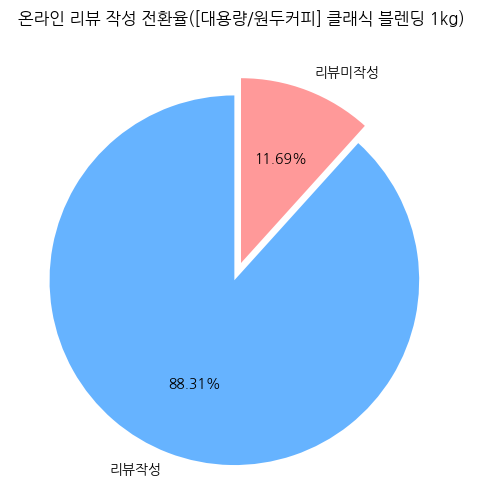

In [ ]:
# 데이터 예시 (라벨과 값)
labels = ['리뷰작성', '리뷰미작성']
values = [88.31, 11.69]

# 색상 설정
colors = ['#66b3ff', '#ff9999']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 리뷰 작성 전환율([대용량/원두커피] 클래식 블렌딩 1kg)')

# 파이 차트 그리기
plt.show()

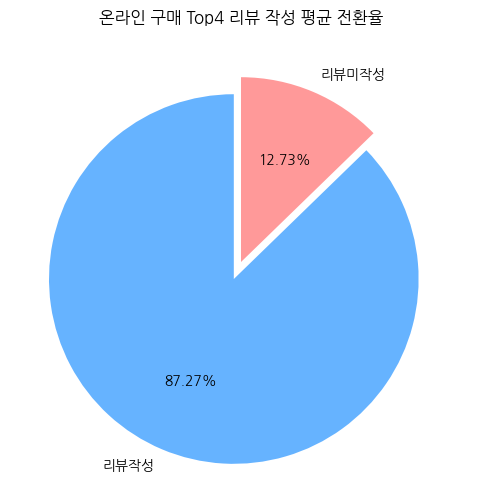

In [ ]:
# 스마트스토어 구매 Top4 리뷰전환율 평균

labels = ['리뷰작성', '리뷰미작성']
values = [87.27, 12.73]

# 색상 설정
colors = ['#66b3ff', '#ff9999']

explode = (0.1, 0)

# Figure 크기 지정
plt.figure(figsize=(6, 6))

# 파이 차트 그리기
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)

# 차트 타이틀
plt.title('온라인 구매 Top4 리뷰 작성 평균 전환율')

# 파이 차트 그리기
plt.show()

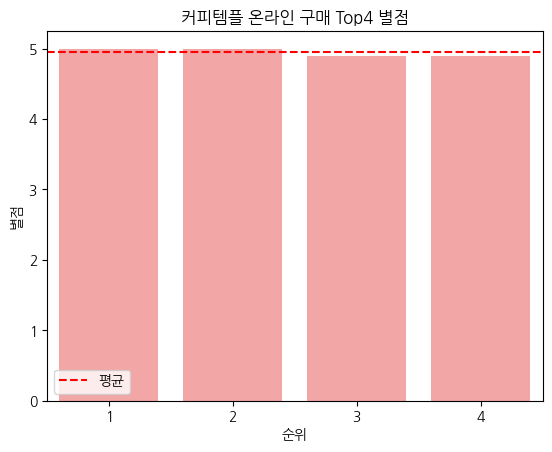

In [ ]:
# 평균 별점
df_star = {'별점':[5, 5, 4.9, 4.9],
           '순위' : [1, 2, 3, 4]}

sns.barplot(x='순위', y='별점', data=df_star, color = '#ff9999')

# 평균 추세선 그리기
mean_value = 4.95
plt.axhline(y=mean_value, color='red', linestyle='--', label='평균')

plt.xlabel('순위')
plt.ylabel('별점')

plt.legend()

plt.title('커피템플 온라인 구매 Top4 별점')

# plt.xticks(rotation = 45)

plt.show()